<a href="https://colab.research.google.com/github/Rookiehhh/AI-NoteBooks/blob/main/site/zh-cn/tutorials/quickstart/advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [11]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 专家的 TensorFlow 2 快速入门

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://tensorflow.google.cn/tutorials/quickstart/advanced"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">View on TensorFlow.org</a>
</td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/advanced.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a></td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/advanced.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 GitHub 上查看源代码</a>
</td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/quickstart/advanced.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a>   </td>
</table>

这是一个 [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) 笔记本。Python 程序可以直接在浏览器中运行，这是学习和使用 Tensorflow 的绝佳方式。要按照本教程操作，请点击此页面顶部的按钮，在 Google Colab 中运行笔记本。

1. 在 Colab 中，连接到 Python 运行时：在菜单栏的右上方，选择 *CONNECT*。
2. 运行所有笔记本代码单元：选择 *Runtime* &gt; *Run all*。

下载并安装 TensorFlow 2。将 TensorFlow 导入您的程序：

注：升级 `pip` 以安装 TensorFlow 2 软件包。请参阅[安装指南](https://tensorflow.google.cn/install)了解详细信息。

将 TensorFlow 导入到您的程序：

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

TensorFlow version: 2.17.1


加载并准备 [MNIST 数据集](http://yann.lecun.com/exdb/mnist/)。

In [13]:
mnist = tf.keras.datasets.mnist   # mnist数据集

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    # 归一化

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [15]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

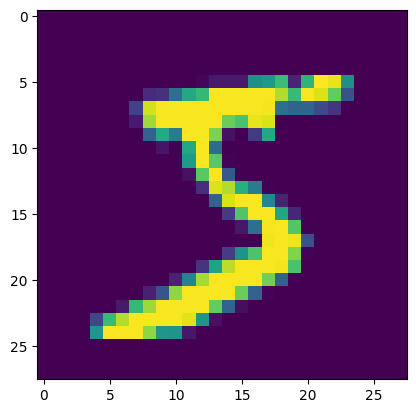

In [16]:
image = x_train[0].reshape(28, 28)
plt.imshow(image)

使用 `tf.data` 将数据集分批和重排：

In [17]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
train_ds, test_ds

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>)

使用 Keras <a>模型子类化 API</a> 构建 <code>tf.keras</code> 模型：

In [18]:
class MyModel(Model):
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')  # 卷积层
    self.flatten = Flatten()  # 展开
    self.d1 = Dense(128, activation='relu') # 致密层
    self.d2 = Dense(10)  # 致密层, 输出10个要素

  def call(self, x):
    """
    类似于PyTorch中的forward函数
    """
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

选择用于训练的优化器和损失函数：

In [19]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)   # 损失函数

optimizer = tf.keras.optimizers.Adam()    # 优化器

选择指标来衡量模型的损失和准确率。这些指标在周期内累积值，然后打印总体结果。

In [ ]:
tf.keras.metrics.Mean(name='train_loss')

In [20]:
train_loss = tf.keras.metrics.Mean(name='train_loss')  # 训练损失
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')   # 准确性

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

使用 `tf.GradientTape`训练模型：

In [ ]:
@tf.function
def train_step(images, labels):
  # 进入一个上下文管理器，以便在其中计算梯度
  with tf.GradientTape() as tape:
      # 使用模型进行预测，设置training=True表示这是训练模式
      # 在训练模式下，某些层（如Dropout）可能会具有与推断模式不同的行为
      predictions = model(images, training=True)

      # 计算损失，这里使用预定义的损失函数将真实标签和预测结果进行比较
      loss = loss_object(labels, predictions)

  # 计算梯度，得到损失相对于模型可训练变量的梯度
  gradients = tape.gradient(loss, model.trainable_variables)

  # 使用优化器应用梯度更新模型参数
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # 更新训练损失和训练准确率的状态
  train_loss(loss)
  train_accuracy(labels, predictions)

测试模型：

In [ ]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

现在，经过训练，照片分类器在此数据集上的准确率约为 98%。要了解详情，请阅读 [TensorFlow 教程](https://tensorflow.google.cn/tutorials)。